# Homework #3
---
Student Name: Sam Crane

Student ID: 801101091

GitHub: https://github.com/samofuture/Intro-to-ML

In [457]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Problem 1

In [458]:
df = pd.read_csv('diabetes.csv')

X = df.iloc[:, 0:7].values
Y = df.iloc[:, 8].values

#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [459]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

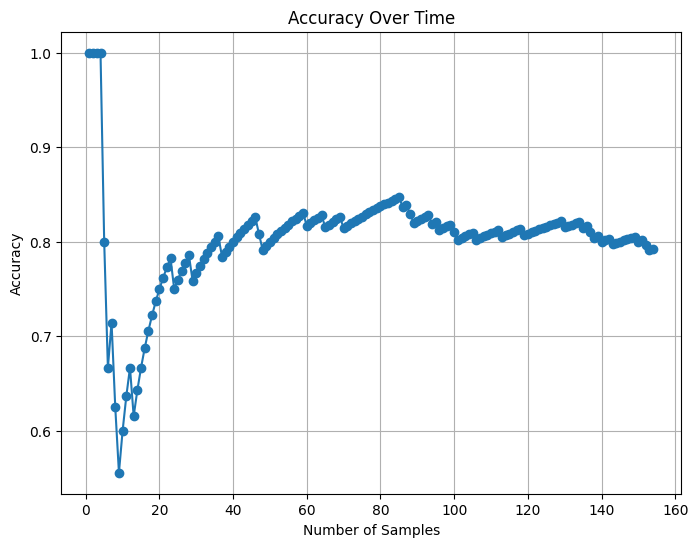

In [460]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, Y_train)

n_samples = len(Y_test)
accuracies_over_time = []

for i in range(1, n_samples + 1):
    y_pred = classifier.predict(X_test[:i])
    accuracy = accuracy_score(Y_test[:i], y_pred)
    accuracies_over_time.append(accuracy)

# Create a graph to visualize accuracy over time
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_samples + 1), accuracies_over_time, marker='o')
plt.xlabel("Number of Samples")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Time")
plt.grid(True)
plt.show()

In [461]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[90,  7],
       [25, 32]])

In [462]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
f1_score =  2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.7922077922077922
Precision: 0.8205128205128205
Recall: 0.5614035087719298
F1 Score: 0.6666666666666666


Text(0.5, 427.9555555555555, 'Predicted label')

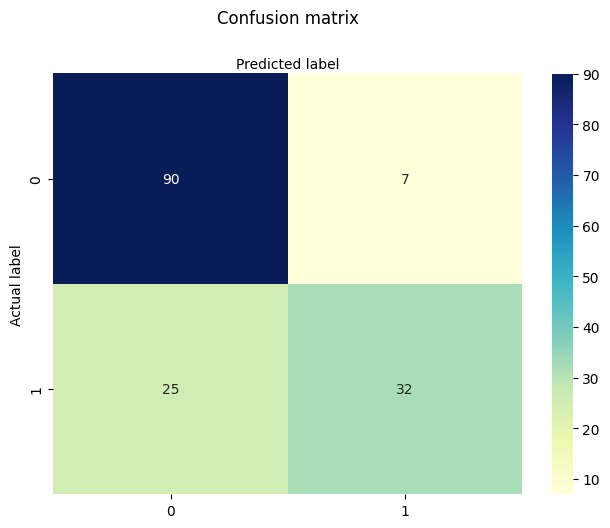

In [463]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Problem 2a

In [464]:
df = pd.read_csv('cancer.csv')
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Y = df.iloc[:, 1].values
df = df.drop(columns='diagnosis', axis=1)
X = df.iloc[:, 1:].values

#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [465]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [466]:
classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=10)

In [467]:
#Using Confusion matrix we can get accuracy of our model.

Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [468]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



Text(0.5, 427.9555555555555, 'Predicted label')

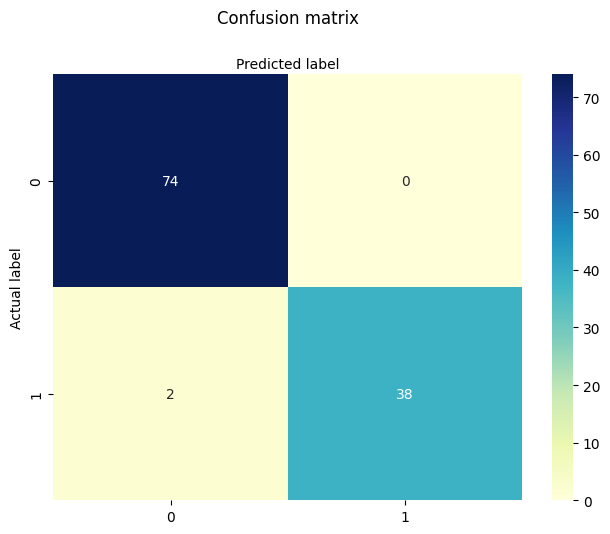

In [469]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Problem 2b

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        74
           1       0.97      0.80      0.88        40

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114



Text(0.5, 427.9555555555555, 'Predicted label')

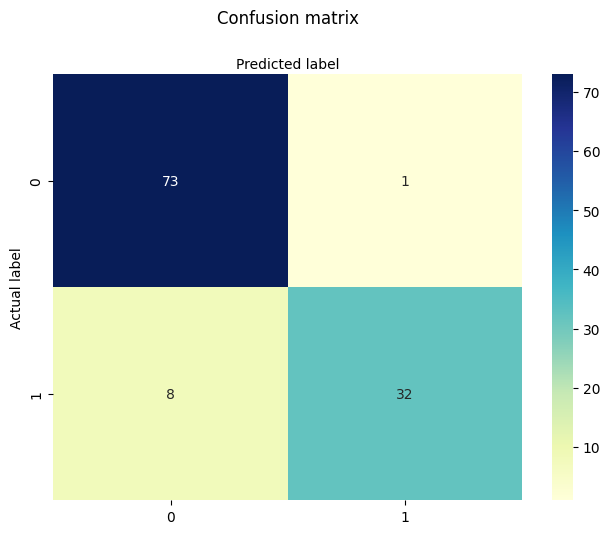

In [488]:
classifier = LogisticRegression(random_state=10, penalty='l2', C=0.8)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

print(metrics.classification_report(Y_test, Y_pred))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Problem 3

In [471]:
df = pd.read_csv('cancer.csv')
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Y = df.iloc[:, 1].values
df = df.drop(columns='diagnosis', axis=1)
X = df.iloc[:, 1:].values

#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [472]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [473]:
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the data
model = GaussianNB()

model.fit(X_train, Y_train)
# make predictions
expected = Y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       0.95      0.90      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 427.9555555555555, 'Predicted label')

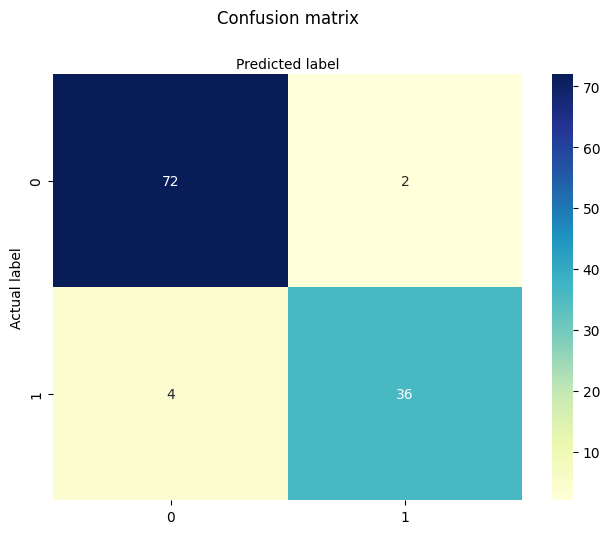

In [474]:
cnf_matrix = metrics.confusion_matrix(expected, predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Bayesian classifier performed worse than the normal Logistic Regression in problem 2a. Although, it outperformed Problem 2b in recall and precision. These conclusions are also supported by the f1 score, where 2a has the highest, 3 is second highest, and 2b is lowest.

## Problem 4

In [475]:
df = pd.read_csv('cancer.csv')
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Y = df.iloc[:, 1].values
df = df.drop(columns='diagnosis', axis=1)
X = df.iloc[:, 1:].values

In [476]:
from sklearn.decomposition import PCA
k = 30
max_accuracy = 0
max_acc_index = 0
for n in range(1, k+1):
    pc_list = [f'pc{i}' for i in range(n)]
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = pc_list)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    classifier = LogisticRegression(random_state=10)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred)

    acc = metrics.accuracy_score(Y_test, Y_pred)
    if acc > max_accuracy:
        max_accuracy = acc
        max_acc_index = n
    # print(f'{n} PC:', acc)
    print(metrics.classification_report(Y_test, Y_pred))
print(f'{max_acc_index}: {max_accuracy}')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        74
           1       0.97      0.80      0.88        40

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        74
           1       1.00      0.78      0.87        40

    accuracy                           0.92       114
   macro avg       0.95      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        74
           1       1.00      0.78      0.87        40

    accuracy                           0.92       114
   macro avg       0.95      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114

              preci

In [477]:
pc_list = [f'pc{i}' for i in range(max_acc_index)]
pca = PCA(n_components=max_acc_index)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=pc_list)

X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = LogisticRegression(random_state=10)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)

print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 427.9555555555555, 'Predicted label')

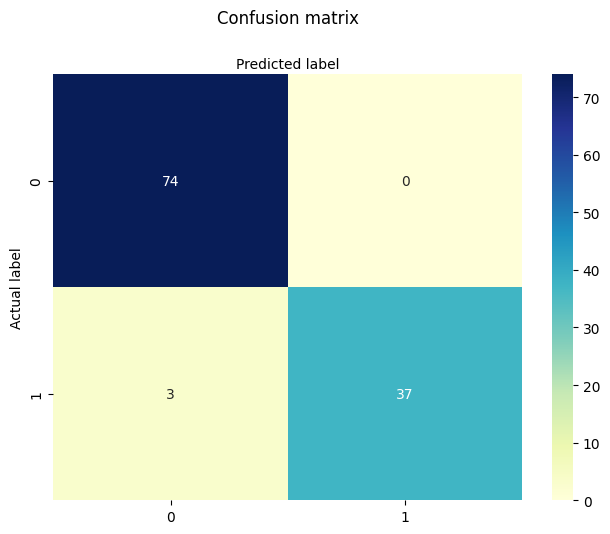

In [478]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Compared to the previous questions, based on the f1 scores, this model is slightly worse than 2a, being above 3 and 2b in performance.

## Problem 5

In [479]:
df = pd.read_csv('cancer.csv')
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
Y = df.iloc[:, 1].values
df = df.drop(columns='diagnosis', axis=1)
X = df.iloc[:, 1:].values

In [480]:
k = 30
max_accuracy = 0
max_acc_index = 0
for n in range(1, k+1):
    pc_list = [f'pc{i}' for i in range(n)]
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = pc_list)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    model = GaussianNB()
    model.fit(X_train, Y_train)

    predicted = model.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, predicted)

    acc = metrics.accuracy_score(Y_test, predicted)
    if acc > max_accuracy:
        max_accuracy = acc
        max_acc_index = n

    print(metrics.classification_report(Y_test, predicted))
print(f'{max_acc_index}: {max_accuracy}')

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        74
           1       0.97      0.78      0.86        40

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        74
           1       0.97      0.72      0.83        40

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        74
           1       0.97      0.72      0.83        40

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

              preci

In [481]:
pc_list = [f'pc{i}' for i in range(max_acc_index)]
pca = PCA(n_components=max_acc_index)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=pc_list)

X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state = 7)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

model = GaussianNB()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, predicted)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        74
           1       0.97      0.78      0.86        40

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



Text(0.5, 427.9555555555555, 'Predicted label')

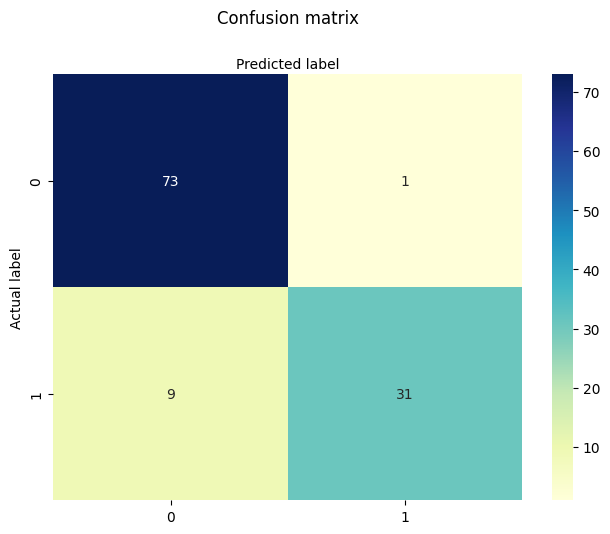

In [482]:
cnf_matrix = metrics.confusion_matrix(Y_test, predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

This model had the worst f1 scores, being slightly below 2b.